In [132]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import meteva.method as mem
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


一分为二的预测说：“是的，将会发生一个事件”，或者“否，该事件不会发生”。雨雾预报是是/否预报的常见示例。对于某些应用，可以指定阈值以分隔“是”和“否”，例如，风速大于50节。

为了验证这种类型的预测，我们从列联表开始，该表显示“是”和“否”的预测和出现的频率（样本数）。预测（是或否）和观测值（是或否）的四种组合称为联合分布：

     命中-事件预测发生，并且确实发生了
     漏报-事件预测未发生，但确实发生了
     空报-发生事件预测，但未发生
     正确的否定-事件预测不会发生，也不会发生

列联表的左下方给出了观测和预测的发生与未发生的总数，称为边际分布。  
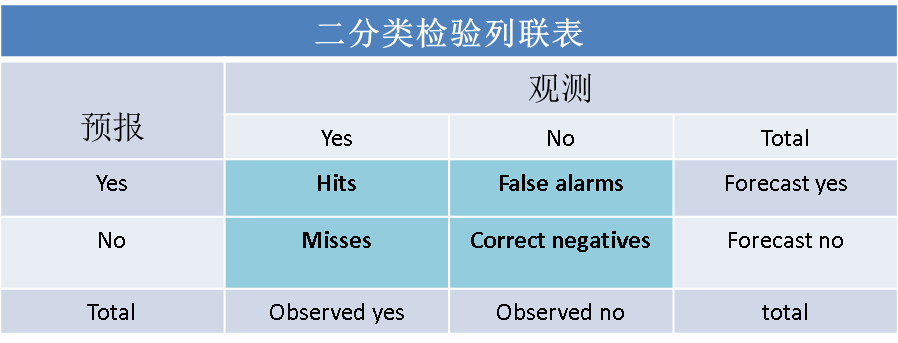
以下结合随机生成的测试数据，说明基于上述列联表计算的各种检验指标 

In [2]:
ob = np.random.randn(10)
fo2 = np.random.randn(2,10)
fo1 = fo2[0,:]
grade_list = [0.1,0.2,0.3,0.4,0.5]

In [3]:
ob

array([-0.20107392, -1.82361393,  0.0805265 , -0.08182211,  0.43747497,
        0.2668231 , -1.07526517,  0.13564374,  0.48197602,  0.6400138 ])

In [4]:
fo2

array([[ 0.45681356, -0.5800519 ,  0.43331192, -1.23816479,  0.08804206,
        -0.57825988,  0.80835277,  0.34701277, -0.27275805,  0.20602752],
       [-0.03489294,  0.29446032,  0.86773504,  0.74420096,  0.63677105,
         1.65680722,  0.52273958,  1.75974589, -0.73307699, -0.94489694]])

**<font face="黑体" color=blue size = 5>命中、空报、漏报、正确否定</font>**     
**hfmc(ob, fo, grade_list=[1e-30])**  
用来计算常用二分类预报检验指标的中间统计量    


|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=blue size = 5>ob</font>**|实况数据, 任意维numpy数组|   
|**<font face="黑体" color=blue size = 5>fo</font>**| fo比Ob.shape多一维或者保持一致，fo.shape低维与ob.shape保持一致|   
|**grade_list**| 该参数用于对连续变量做多种等级阈值的二分类检验，其中包含多个事件是否记录为发生的判断阈值，记其中一个阈值为g，则判断为事件发生的条件是要素值 >= g。该参数缺省时列表中只包含一个取值为1e-30的阈值，由于气象要素精度通常比该缺省值大，因此它相当于将 >0 作为事件发生的判据 |  
    |<font face="黑体" color=blue size=5>return</font>|返回结果为一维或多维数组，最后一维长度为4，其内容依次为命中、空报、漏报、正确否定的样本数。         如果fo和ob的shape一致（即只有一种预报）,返回2维数组，shape = (等级数，4）；    如果fo比ob高出一维，len(grade_list) >1时，则返回3维数组，shape = (预报成员数，等级数，4）。|  
   
**调用示例：**  

In [5]:
hfmc_array0 = mem.hfmc(ob,fo1)  #单个预报，默认单个等级时
hfmc_array0.shape

(1, 4)

In [6]:
hfmc_array1 = mem.hfmc(ob,fo1,grade_list)  #单个预报，指定多个等级
hfmc_array1.shape

(5, 4)

In [7]:
hfmc_array2 = mem.hfmc(ob,fo2)  #多个预报，默认单个等级
hfmc_array2.shape

(2, 1, 4)

In [8]:
hfmc_array3 = mem.hfmc(ob,fo2,grade_list)  #多个预报，指定多个等级
hfmc_array3.shape

(2, 5, 4)

在上述示例中，hfmc返回结果是一个数组，最后一维长度为4，倒数第2维长度为2，和grade_list对应。返回结果hfmc_array将在后续示例中被应用。

**<font face="黑体" color=blue size = 5>观测和预报发生率</font>**     
**ob_fo_hr(ob, fo,grade_list=[1e-30])**  
基于原始数据计算观测和预报的发生率，happen rate： Observed（or Forecast） yes/Total  

|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=blue size = 5>ob</font>**|实况数据, 任意维numpy数组|   
|**<font face="黑体" color=blue size = 5>fo</font>**| fo比Ob.shape多一维或者保持一致，fo.shape低维与ob.shape保持一致|   
|**grade_list**| 该参数用于对连续变量做多种等级阈值的二分类检验，其中包含多个事件是否记录为发生的判断阈值，记其中一个阈值为g，则判断为事件发生的条件是要素值 >= g。该参数缺省时列表中只包含一个取值为1e-30的阈值，由于气象要素精度通常比该缺省值大，因此它相当于将 >0 作为事件发生的判据 |  
|<font face="黑体" color=blue size=5>return</font>|返回2维数组，shape = (1+预报成员数,等级数），其中result[0,:]是各等级观测的发生率，result[1:,:]是各等级预报场的发生率|    


**<font face="黑体" color=blue size = 5>观测和预报发生率</font>**     
**ob_fo_hr_hfmc(hfmc_array)**  
基于中间结果计算 happen rate： happen rate： Observed（or Forecast） yes/Total  


|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=blue size = 5>hfmc_array</font>**|包含检验中间结果的多维数组，其中最后一维长度为4，分别记录了命中、空报、漏报、正确否定的样本数，它通常是hfmc函数的计算结果，或者计算结果的累加|   
|<font face="黑体" color=blue size=5>return</font>|数组，它比hfmc_array少了最后一维。但第一维长度等于预报成员数+1，其中result[0,:]是各等级观测的发生率，result[1:,:]是各等级预报场的发生率|   
     
**调用示例：**  

In [9]:
mem.ob_fo_hr(ob,fo1)    #单个预报，默认单个等级

array([[0.6],
       [0.6]])

In [10]:
mem.ob_fo_hr(ob,fo1,grade_list)  #单个预报，指定多个等级

array([[0.5, 0.4, 0.3, 0.3, 0.1],
       [0.5, 0.5, 0.4, 0.3, 0.1]])

In [11]:
mem.ob_fo_hr(ob,fo2)    #多个预报，默认单个等级

array([[0.6],
       [0.6],
       [0.7]])

In [12]:
mem.ob_fo_hr(ob,fo2,grade_list)  #多个预报，指定多个等级

array([[0.5, 0.4, 0.3, 0.3, 0.1],
       [0.5, 0.5, 0.4, 0.3, 0.1],
       [0.7, 0.7, 0.6, 0.6, 0.6]])

In [13]:
mem.ob_fo_hr_hfmc(hfmc_array0)  #单个预报，默认单个等级

array([[0.6],
       [0.6]])

In [15]:
mem.ob_fo_hr_hfmc(hfmc_array1)  #单个，指定多个等级

array([[0.5, 0.4, 0.3, 0.3, 0.1],
       [0.5, 0.5, 0.4, 0.3, 0.1]])

In [16]:
mem.ob_fo_hr_hfmc(hfmc_array2)  #多个预报，默认单个等级

array([[0.6],
       [0.6],
       [0.7]])

In [17]:
mem.ob_fo_hr_hfmc(hfmc_array3)  #多个预报，指定多个等级

array([[0.5, 0.4, 0.3, 0.3, 0.1],
       [0.5, 0.5, 0.4, 0.3, 0.1],
       [0.7, 0.7, 0.6, 0.6, 0.6]])

**<font face="黑体" color=blue size = 5>准确率 </font>**     
**pc(ob, fo,grade_list=[1e-30])**  
基于原始数据计算accuracy： （Hits+ Correct negatives）/Total，反映被正确预报的样本占比

|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=blue size = 5>ob</font>**|实况数据, 任意维numpy数组|   
|**<font face="黑体" color=blue size = 5>fo</font>**| fo比Ob.shape多一维或者保持一致，fo.shape低维与ob.shape保持一致|   
|**grade_list**| 该参数用于对连续变量做多种等级阈值的二分类检验，其中包含多个事件是否记录为发生的判断阈值，记其中一个阈值为g，则判断为事件发生的条件是要素值 >= g。该参数缺省时列表中只包含一个取值为1e-30的阈值，由于气象要素精度通常比该缺省值大，因此它相当于将 >0 作为事件发生的判据 |  
|<font face="黑体" color=blue size=5>return</font>|如果fo和ob的shape一致（即只有一种预报）当仅有一个等级，则返回结果为实数，当有多个等级，则返回1维数组,shape = (等级数）；如果fo比ob高出一维，则返回2维数组，shape = （预报成员数，等级数）。其中每个元素为0到1的实数，完美预报对应值为1 |  


**<font face="黑体" color=blue size = 5>准确率 </font>**     
**pc_hfmc(hfmc_array)**  
基于中间结果计算 accuracy： （Hits+ Correct negatives）/Total，反映被正确预报的样本占比


|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=blue size = 5>hfmc_array</font>**|包含检验中间结果的多维数组，其中最后一维长度为4，分别记录了命中、空报、漏报、正确否定的样本数，它通常是hfmc函数的计算结果，或者计算结果的累加|   
|<font face="黑体" color=blue size=5>return</font>|整数或数组，它比hfmc_array少了最后一维。其中每个元素为0到1的实数，完美预报对应值为1| 

      
**调用示例：** 

In [18]:
mem.pc(ob,fo1)  #单个预报，默认单个等级

0.6

In [19]:
mem.pc(ob,fo2)   #多个预报，默认单个等级

array([[0.6],
       [0.5]])

In [20]:
mem.pc(ob,fo1,grade_list)  #单个预报，指定多个等级

array([0.4, 0.3, 0.3, 0.4, 0.8])

In [21]:
mem.pc(ob,fo2,grade_list)  #多个预报，指定多个等级

array([[0.4, 0.3, 0.3, 0.4, 0.8],
       [0.4, 0.3, 0.3, 0.3, 0.3]])

In [22]:
mem.pc_hfmc(hfmc_array0)  #单个预报，默认单个等级

0.6

In [23]:
mem.pc_hfmc(hfmc_array1) #单个预报，指定多个等级

array([0.4, 0.3, 0.3, 0.4, 0.8])

In [24]:
mem.pc_hfmc(hfmc_array2)  #多个预报，默认单个等级

array([[0.6],
       [0.5]])

In [25]:
mem.pc_hfmc(hfmc_array3)  #多个预报，指定多个等级

array([[0.4, 0.3, 0.3, 0.4, 0.8],
       [0.4, 0.3, 0.3, 0.3, 0.3]])

**<font face="黑体" color=blue size = 5>命中率</font>**     
**pod(ob, fo,grade_list=[1e-30])**  
基于原始数据计算hit rate： Hits/(Hits + Misses)，反映观测的正样本中多少被预报  

|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=blue size = 5>ob</font>**|实况数据, 任意维numpy数组|   
|**<font face="黑体" color=blue size = 5>fo</font>**| fo比Ob.shape多一维或者保持一致，fo.shape低维与ob.shape保持一致|   
|**grade_list**| 该参数用于对连续变量做多种等级阈值的二分类检验，其中包含多个事件是否记录为发生的判断阈值，记其中一个阈值为g，则判断为事件发生的条件是要素值 >= g。该参数缺省时列表中只包含一个取值为1e-30的阈值，由于气象要素精度通常比该缺省值大，因此它相当于将 >0 作为事件发生的判据 |  
|<font face="黑体" color=blue size=5>return</font>|如果fo和ob的shape一致（即只有一种预报）当仅有一个等级，则返回结果为实数，当有多个等，则级返回1维数组,shape = (等级数）；如果fo比ob高出一维，则返回2维数组，shape = （预报成员数，等级数）。其中每个元素为0到1的实数，完美预报对应值为1  |  



**<font face="黑体" color=blue size = 5>命中率</font>**     
**pod_hfmc(hfmc_array)**  
基于中间结果计算hit rate：Hits/(Hits + Misses)，反映观测的正样本中多少被预报  

|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=blue size = 5>hfmc_array</font>**|包含检验中间结果的多维数组，其中最后一维长度为4，分别记录了命中、空报、漏报、正确否定的样本数，它通常是hfmc函数的计算结果，或者计算结果的累加|   
|<font face="黑体" color=blue size=5>return</font>|整数或数组，它比hfmc_array少了最后一维。其中每个元素为0到1的实数，完美预报对应值为1|      
**调用示例：** 

In [26]:
mem.pod(ob,fo1)  #单个预报，默认单个等级

0.6666666666666666

In [27]:
mem.pod(ob,fo2)  #多个预报，默认单个等级

array([[0.66666667],
       [0.66666667]])

In [28]:
mem.pod(ob,fo1,grade_list)  #单个预报，指定单个等级

array([0.4 , 0.25, 0.  , 0.  , 0.  ])

In [29]:
mem.pod(ob,fo2,grade_list)  #多个预报，指定多个等级

array([[0.4       , 0.25      , 0.        , 0.        , 0.        ],
       [0.6       , 0.5       , 0.33333333, 0.33333333, 0.        ]])

In [30]:
mem.pod_hfmc(hfmc_array0)  #单个预报，默认单个等级

0.6666666666666666

In [31]:
mem.pod_hfmc(hfmc_array1)   #单个预报，指定多个等级

array([0.4 , 0.25, 0.  , 0.  , 0.  ])

In [32]:
mem.pod_hfmc(hfmc_array2)   #多个预报，默认单个等级

array([[0.66666667],
       [0.66666667]])

In [33]:
mem.pod_hfmc(hfmc_array3)   #多个预报，指定多个等级

array([[0.4       , 0.25      , 0.        , 0.        , 0.        ],
       [0.6       , 0.5       , 0.33333333, 0.33333333, 0.        ]])

**<font face="黑体" color=blue size = 5> 成功率 </font>**     
**sr(ob, fo,grade_list=[1e-30])**  
基于原始数据计算Success ratio ： Hits/(Hits + False alarms)，反映预报的正样本中实际发生的比例  

|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=blue size = 5>ob</font>**|实况数据, 任意维numpy数组|   
|**<font face="黑体" color=blue size = 5>fo</font>**| fo比Ob.shape多一维或者保持一致，fo.shape低维与ob.shape保持一致|   
|**grade_list**| 该参数用于对连续变量做多种等级阈值的二分类检验，其中包含多个事件是否记录为发生的判断阈值，记其中一个阈值为g，则判断为事件发生的条件是要素值 >= g。该参数缺省时列表中只包含一个取值为1e-30的阈值，由于气象要素精度通常比该缺省值大，因此它相当于将 >0 作为事件发生的判据 |  
|<font face="黑体" color=blue size=5>return</font>|如果fo和ob的shape一致（即只有一种预报）当仅有一个等级，则返回结果为实数，当有多个等级，则返回1维数组,shape = (等级数）；如果fo比ob高出一维，则返回2维数组，shape = （预报成员数，等级数）。其中每个元素为0到1的实数，完美预报对应值为1  |   
   
**<font face="黑体" color=blue size = 5>成功率</font>**     
**sr_hfmc(hfmc_array)**  
基于中间结果计算Success ratio ： Hits/(Hits + False alarms)，反映预报的正样本中实际发生的比例  

|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=blue size = 5>hfmc_array</font>**|包含检验中间结果的多维数组，其中最后一维长度为4，分别记录了命中、空报、漏报、正确否定的样本数，它通常是hfmc函数的计算结果，或者计算结果的累加|   
|<font face="黑体" color=blue size=5>return</font>|整数或数组，它比hfmc_array少了最后一维。其中每个元素为0到1的实数，完美预报对应值为1|       
**调用示例：** 

In [34]:
mem.sr(ob,fo1)  #单个预报，默认单个等级

0.6666666666666666

In [35]:
mem.sr(ob,fo2)   #多个预报，默认单个等级

array([[0.66666667],
       [0.57142857]])

In [36]:
mem.sr(ob,fo1,grade_list)  #单个预报，指定多个等级

array([0.4, 0.2, 0. , 0. , 0. ])

In [37]:
mem.sr(ob,fo2,grade_list)  #多个预报，指定多个等级

array([[0.4       , 0.2       , 0.        , 0.        , 0.        ],
       [0.42857143, 0.28571429, 0.16666667, 0.16666667, 0.        ]])

In [38]:
mem.sr_hfmc(hfmc_array0)  #单个预报，默认单个等级

0.6666666666666666

In [39]:
mem.sr_hfmc(hfmc_array1)  #单个预报，指定多个等级

array([0.4, 0.2, 0. , 0. , 0. ])

In [40]:
mem.sr_hfmc(hfmc_array2)    #多个预报，默认单个等级

array([[0.66666667],
       [0.57142857]])

In [41]:
mem.sr_hfmc(hfmc_array3)   #多个预报，指定多个等级

array([[0.4       , 0.2       , 0.        , 0.        , 0.        ],
       [0.42857143, 0.28571429, 0.16666667, 0.16666667, 0.        ]])

**<font face="黑体" color=blue size = 5>报空率 </font>**     
**pofd(ob, fo,grade_list=[1e-30])**  
基于原始数据计算Probability of false detection： False alarms/(False alarms + Correct negatives)，反映观测负样本被预报为正样本的比例  

|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=blue size = 5>ob</font>**|实况数据, 任意维numpy数组|   
|**<font face="黑体" color=blue size = 5>fo</font>**| fo比Ob.shape多一维或者保持一致，fo.shape低维与ob.shape保持一致|   
|**grade_list**| 该参数用于对连续变量做多种等级阈值的二分类检验，其中包含多个事件是否记录为发生的判断阈值，记其中一个阈值为g，则判断为事件发生的条件是要素值 >= g。该参数缺省时列表中只包含一个取值为1e-30的阈值，由于气象要素精度通常比该缺省值大，因此它相当于将 >0 作为事件发生的判据 |  
|<font face="黑体" color=blue size=5>return</font>|如果fo和ob的shape一致（即只有一种预报）当仅有一个等级，则返回结果为实数，当有多个等级，则返回1维数组,shape = (等级数）；如果fo比ob高出一维，则返回2维数组，shape = （预报成员数，等级数）。其中每个元素为0到1的实数，完美预报对应值为0  |         

**<font face="黑体" color=blue size = 5>报空率 </font>**     
**pofd_hfmc(hfmc_array)**  
基于中间结果计算Probability of false detection： False alarms/(False alarms + Correct negatives)，反映观测负样本被预报为正样本的比例    

|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=blue size = 5>hfmc_array</font>**|包含检验中间结果的多维数组，其中最后一维长度为4，分别记录了命中、空报、漏报、正确否定的样本数，它通常是hfmc函数的计算结果，或者计算结果的累加|   
|<font face="黑体" color=blue size=5>return</font>|整数或数组，它比hfmc_array少了最后一维。其中每个元素为0到1的实数，完美预报对应值为0|      
**调用示例：** 

In [42]:
mem.pofd(ob,fo1)  #单个预报，默认单个等级

0.5

In [43]:
mem.pofd(ob,fo2)  #单个预报，指定多个等级

array([[0.5 ],
       [0.75]])

In [44]:
mem.pofd(ob,fo1,grade_list)   #多个预报，默认单个等级

array([0.6       , 0.66666667, 0.57142857, 0.42857143, 0.11111111])

In [45]:
mem.pofd(ob,fo2,grade_list)   #多个预报，指定多个等级

array([[0.6       , 0.66666667, 0.57142857, 0.42857143, 0.11111111],
       [0.8       , 0.83333333, 0.71428571, 0.71428571, 0.66666667]])

In [46]:
mem.pofd_hfmc(hfmc_array0)  #单个预报，默认单个等级

0.5

In [47]:
mem.pofd_hfmc(hfmc_array1)  #单个预报，指定多个等级

array([0.6       , 0.66666667, 0.57142857, 0.42857143, 0.11111111])

In [48]:
mem.pofd_hfmc(hfmc_array2)   #多个预报，默认单个等级

array([[0.5 ],
       [0.75]])

In [49]:
mem.pofd_hfmc(hfmc_array3)   #多个预报，指定多个等级

array([[0.6       , 0.66666667, 0.57142857, 0.42857143, 0.11111111],
       [0.8       , 0.83333333, 0.71428571, 0.71428571, 0.66666667]])

**<font face="黑体" color=blue size = 5>空报率 </font>**     
**far(ob, fo,grade_list=[1e-30])**  
基于原始数据计算False alarm ratio： False alarms/(Hit + False alarms)，反映预报的正样本中实际未发生的比例   

|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=blue size = 5>ob</font>**|实况数据, 任意维numpy数组|   
|**<font face="黑体" color=blue size = 5>fo</font>**| fo比Ob.shape多一维或者保持一致，fo.shape低维与ob.shape保持一致|   
|**grade_list**| 该参数用于对连续变量做多种等级阈值的二分类检验，其中包含多个事件是否记录为发生的判断阈值，记其中一个阈值为g，则判断为事件发生的条件是要素值 >= g。该参数缺省时列表中只包含一个取值为1e-30的阈值，由于气象要素精度通常比该缺省值大，因此它相当于将 >0 作为事件发生的判据 |  
|<font face="黑体" color=blue size=5>return</font>|如果fo和ob的shape一致（即只有一种预报）当仅有一个等级，则返回结果为实数，当有多个等级，则返回1维数组,shape = (等级数）；如果fo比ob高出一维，则返回2维数组，shape = （预报成员数，等级数）。其中每个元素为0到1的实数，完美预报对应值为0|            

**<font face="黑体" color=blue size = 5>空报率</font>**     
**far_hfmc(hfmc_array)**  
基于中间结果计算False alarm ratio： False alarms/(Hit + False alarms)，反映预报的正样本中实际未发生的比例      

|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=blue size = 5>hfmc_array</font>**|包含检验中间结果的多维数组，其中最后一维长度为4，分别记录了命中、空报、漏报、正确否定的样本数，它通常是hfmc函数的计算结果，或者计算结果的累加|   
|<font face="黑体" color=blue size=5>return</font>|整数或数组，它比hfmc_array少了最后一维。其中每个元素为0到1的实数，完美预报对应值为1|      
**调用示例：** 

In [50]:
mem.far(ob,fo1)  #单个预报，默认单个等级

0.3333333333333333

In [51]:
mem.far(ob,fo2)   #单个预报，指定多个等级

array([[0.33333333],
       [0.42857143]])

In [52]:
mem.far(ob,fo1,grade_list)    #多个预报，默认单个等级

array([0.6, 0.8, 1. , 1. , 1. ])

In [53]:
mem.far(ob,fo2,grade_list)   #多个预报，指定多个等级

array([[0.6       , 0.8       , 1.        , 1.        , 1.        ],
       [0.57142857, 0.71428571, 0.83333333, 0.83333333, 1.        ]])

In [54]:
mem.far_hfmc(hfmc_array0)   #单个预报，默认单个等级

0.3333333333333333

In [55]:
mem.far_hfmc(hfmc_array1)  #单个预报，指定多个等级

array([0.6, 0.8, 1. , 1. , 1. ])

In [56]:
mem.far_hfmc(hfmc_array2)   #多个预报，默认单个等级

array([[0.33333333],
       [0.42857143]])

In [57]:
mem.far_hfmc(hfmc_array3)  #多个预报，指定多个等级

array([[0.6       , 0.8       , 1.        , 1.        , 1.        ],
       [0.57142857, 0.71428571, 0.83333333, 0.83333333, 1.        ]])

**<font face="黑体" color=blue size = 5>漏报率</font>**     
**mr(ob, fo,grade_list=[1e-30])**  
基于原始数据计算Miss ratio： Misses/(Hit + Misses)，反映观测正样本被预报为负样本的比例    

|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=blue size = 5>ob</font>**|实况数据, 任意维numpy数组|   
|**<font face="黑体" color=blue size = 5>fo</font>**| fo比Ob.shape多一维或者保持一致，fo.shape低维与ob.shape保持一致|   
|**grade_list**| 该参数用于对连续变量做多种等级阈值的二分类检验，其中包含多个事件是否记录为发生的判断阈值，记其中一个阈值为g，则判断为事件发生的条件是要素值 >= g。该参数缺省时列表中只包含一个取值为1e-30的阈值，由于气象要素精度通常比该缺省值大，因此它相当于将 >0 作为事件发生的判据 |  
|<font face="黑体" color=blue size=5>return</font>|如如果fo和ob的shape一致（即只有一种预报）当仅有一个等级，则返回结果为实数，当有多个等级，则返回1维数组,shape = (等级数）；如果fo比ob高出一维，则返回2维数组，shape = （预报成员数，等级数）。其中每个元素为0到1的实数，完美预报对应值为0 |       

**<font face="黑体" color=blue size = 5>漏报率</font>**     
**mr_hfmc(hfmc_array)**  
基于中间结果计算Miss ratio： Misses/(Hit + Misses)，反映观测正样本被预报为负样本的比例       

|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=blue size = 5>hfmc_array</font>**|包含检验中间结果的多维数组，其中最后一维长度为4，分别记录了命中、空报、漏报、正确否定的样本数，它通常是hfmc函数的计算结果，或者计算结果的累加|   
|<font face="黑体" color=blue size=5>return</font>|整数或数组，它比hfmc_array少了最后一维。其中每个元素为0到1的实数，完美预报对应值为0|    
**调用示例：** 

In [58]:
mem.mr(ob,fo1)   #单个预报，默认单个等级

0.3333333333333333

In [59]:
mem.mr(ob,fo2)    #单个预报，指定多个等级

array([[0.33333333],
       [0.33333333]])

In [60]:
mem.mr(ob,fo1,grade_list)    #多个预报，默认单个等级

array([0.6 , 0.75, 1.  , 1.  , 1.  ])

In [61]:
mem.mr(ob,fo2,grade_list)  #多个预报，指定多个等级

array([[0.6       , 0.75      , 1.        , 1.        , 1.        ],
       [0.4       , 0.5       , 0.66666667, 0.66666667, 1.        ]])

In [62]:
mem.mr_hfmc(hfmc_array0)   #单个预报，默认单个等级

0.3333333333333333

In [63]:
mem.mr_hfmc(hfmc_array1)   #单个预报，指定多个等级

array([0.6 , 0.75, 1.  , 1.  , 1.  ])

In [64]:
mem.mr_hfmc(hfmc_array2)    #多个预报，默认单个等级

array([[0.33333333],
       [0.33333333]])

In [65]:
mem.mr_hfmc(hfmc_array3)  #多个预报，指定多个等级

array([[0.6       , 0.75      , 1.        , 1.        , 1.        ],
       [0.4       , 0.5       , 0.66666667, 0.66666667, 1.        ]])

**<font face="黑体" color=blue size = 5> 偏差</font>**     
**bias(ob, fo,grade_list=[1e-30])**  
基于原始数据计算bias：(Hit + False alarms)/(Hit + Misses)，反映预报的正样本数 和 观测的正样本数的比值    

|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=blue size = 5>ob</font>**|实况数据, 任意维numpy数组|   
|**<font face="黑体" color=blue size = 5>fo</font>**| fo比Ob.shape多一维或者保持一致，fo.shape低维与ob.shape保持一致|   
|**grade_list**| 该参数用于对连续变量做多种等级阈值的二分类检验，其中包含多个事件是否记录为发生的判断阈值，记其中一个阈值为g，则判断为事件发生的条件是要素值 >= g。该参数缺省时列表中只包含一个取值为1e-30的阈值，由于气象要素精度通常比该缺省值大，因此它相当于将 >0 作为事件发生的判据 |  
|<font face="黑体" color=blue size=5>return</font>|如果fo和ob的shape一致（即只有一种预报）当仅有一个等级，则返回结果为实数，当有多个等级，则返回1维数组,shape = (等级数）；如果fo比ob高出一维，则返回2维数组，shape = （预报成员数，等级数）。其中每个元素值为0到正无穷的实数，完美预报对应值为1|          

**<font face="黑体" color=blue size = 5>偏差</font>**     
**bias_hfmc(hfmc_array)**  
基于中间结果计算bias：(Hit + False alarms)/(Hit + Misses)，反映预报的正样本数 和 观测的正样本数的比值         

|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=blue size = 5>hfmc_array</font>**|包含检验中间结果的多维数组，其中最后一维长度为4，分别记录了命中、空报、漏报、正确否定的样本数，它通常是hfmc函数的计算结果，或者计算结果的累加|   
|<font face="黑体" color=blue size=5>return</font>|整数或数组，它比hfmc_array少了最后一维。 其中每个元素值为0到正无穷的实数，完美预报对应值为1 |      
**调用示例：** 

In [66]:
mem.bias(ob,fo1)  #单个预报，默认单个等级

1.0

In [67]:
mem.bias(ob,fo2)  #单个预报，指定多个等级

array([[1.        ],
       [1.16666667]])

In [68]:
mem.bias(ob,fo1,grade_list)   #多个预报，默认单个等级

array([1.        , 1.25      , 1.33333333, 1.        , 1.        ])

In [69]:
mem.bias(ob,fo2,grade_list)  #多个预报，指定多个等级

array([[1.        , 1.25      , 1.33333333, 1.        , 1.        ],
       [1.4       , 1.75      , 2.        , 2.        , 6.        ]])

In [70]:
mem.bias_hfmc(hfmc_array0)  #单个预报，默认单个等级

1.0

In [71]:
mem.bias_hfmc(hfmc_array1)  #单个预报，指定多个等级

array([1.        , 1.25      , 1.33333333, 1.        , 1.        ])

In [72]:
mem.bias_hfmc(hfmc_array2)   #多个预报，默认单个等级

array([[1.        ],
       [1.16666667]])

In [73]:
mem.bias_hfmc(hfmc_array3)  #多个预报，指定多个等级

array([[1.        , 1.25      , 1.33333333, 1.        , 1.        ],
       [1.4       , 1.75      , 2.        , 2.        , 6.        ]])

**<font face="黑体" color=blue size = 5>偏差幅度</font>**     
**bias_extend_linear(bias_array)**  
计算bias偏离1的幅度，采用 (bias - 1）的绝对值表示   

|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=blue size = 5>bias_array</font>**|任意维numpy数组,其中每个元素是bias值|   
|<font face="黑体" color=blue size=5>return</font>|numpy数组，shape和bias_array一致,0到正无穷，最优值为0|      

     

**<font face="黑体" color=blue size = 5>偏差幅度</font>**     
**bias_extend_log(bias_array)**  
计算bias偏离1的幅度，采用 log(bias)的绝对值表示         

|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=blue size = 5>bias_array</font>**|任意维numpy数组,其中每个元素是bias值|   
|<font face="黑体" color=blue size=5>return</font>|numpy数组，shape和bias_array一致,0到正无穷，最优值为0|      
     
**调用示例：** 

In [74]:
bias_array1 = mem.bias(ob,fo1,grade_list)
mem.bias_extend_linear(bias_array1)

array([0.        , 0.25      , 0.33333333, 0.        , 0.        ])

In [75]:
bias_array2 = mem.bias(ob,fo2,grade_list)
mem.bias_extend_linear(bias_array2)

array([[0.        , 0.25      , 0.33333333, 0.        , 0.        ],
       [0.4       , 0.75      , 1.        , 1.        , 5.        ]])

In [76]:
mem.bias_extend_log(bias_array1)

array([0.        , 0.22314355, 0.28768207, 0.        , 0.        ])

In [77]:
mem.bias_extend_log(bias_array2)

array([[0.        , 0.22314355, 0.28768207, 0.        , 0.        ],
       [0.33647224, 0.55961579, 0.69314718, 0.69314718, 1.79175947]])

**<font face="黑体" color=blue size = 5>TS评分</font>**     
**ts(ob, fo,grade_list=[1e-30])**  
基于原始数据计算ts： Hit /(Hit + Misses+ False alarms)，反映预测的正样本与观察到的正样本对应的程度如何    

|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=blue size = 5>ob</font>**|实况数据, 任意维numpy数组|   
|**<font face="黑体" color=blue size = 5>fo</font>**| fo比Ob.shape多一维或者保持一致，fo.shape低维与ob.shape保持一致|   
|**grade_list**| 该参数用于对连续变量做多种等级阈值的二分类检验，其中包含多个事件是否记录为发生的判断阈值，记其中一个阈值为g，则判断为事件发生的条件是要素值 >= g。该参数缺省时列表中只包含一个取值为1e-30的阈值，由于气象要素精度通常比该缺省值大，因此它相当于将 >0 作为事件发生的判据 |  
|<font face="黑体" color=blue size=5>return</font>|如果fo和ob的shape一致（即只有一种预报）当仅有一个等级，则返回结果为实数，当有多个等级，则返回1维数组,shape = (等级数）；如果fo比ob高出一维，则返回2维数组，shape = （预报成员数，等级数）。每个元素值为0到1的实数，完美预报对应值为1 |           

**<font face="黑体" color=blue size = 5>TS评分</font>**     
**ts_hfmc(hfmc_array)**  
基于中间结果计算ts： Hit /(Hit + Misses+ False alarms)，反映预测的正样本与观察到的正样本对应的程度如何          

|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=blue size = 5>hfmc_array</font>**|包含检验中间结果的多维数组，其中最后一维长度为4，分别记录了命中、空报、漏报、正确否定的样本数，它通常是hfmc函数的计算结果，或者计算结果的累加|   
|<font face="黑体" color=blue size=5>return</font>|整数或数组，它比hfmc_array少了最后一维。每个元素值为0到1的实数，完美预报对应值为1 |          
**调用示例：** 

In [78]:
mem.ts(ob,fo1)  #单个预报，默认单个等级

0.5

In [79]:
mem.ts(ob,fo2)    #单个预报，指定多个等级

array([[0.5       ],
       [0.44444444]])

In [80]:
mem.ts(ob,fo1,grade_list)   #多个预报，默认单个等级

array([0.25 , 0.125, 0.   , 0.   , 0.   ])

In [81]:
mem.ts(ob,fo2,grade_list)   #多个预报，指定多个等级

array([[0.25      , 0.125     , 0.        , 0.        , 0.        ],
       [0.33333333, 0.22222222, 0.125     , 0.125     , 0.        ]])

In [82]:
mem.ts_hfmc(hfmc_array0)   #单个预报，默认单个等级

0.5

In [83]:
mem.ts_hfmc(hfmc_array1)   #单个预报，指定多个等级

array([0.25 , 0.125, 0.   , 0.   , 0.   ])

In [84]:
mem.ts_hfmc(hfmc_array2)   #多个预报，默认单个等级

array([[0.5       ],
       [0.44444444]])

In [85]:
mem.ts_hfmc(hfmc_array3)   #多个预报，指定多个等级

array([[0.25      , 0.125     , 0.        , 0.        , 0.        ],
       [0.33333333, 0.22222222, 0.125     , 0.125     , 0.        ]])

**<font face="黑体" color=blue size = 5>ETS评分</font>**     
**ets(ob, fo,grade_list=[1e-30])**  
基于原始数据计算ets： (Hit-Hit_random) /(Hit + Misses+ False alarms - Hit_random)，反映预测的正样本与观察到的正样本对应的程度如何, 其中扣除了随机预报产生的命中数量，Hit_randwom = Forecast yes × Observed yes / Total   

|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=blue size = 5>ob</font>**|实况数据, 任意维numpy数组|   
|**<font face="黑体" color=blue size = 5>fo</font>**| fo比Ob.shape多一维或者保持一致，fo.shape低维与ob.shape保持一致|   
|**grade_list**| 该参数用于对连续变量做多种等级阈值的二分类检验，其中包含多个事件是否记录为发生的判断阈值，记其中一个阈值为g，则判断为事件发生的条件是要素值 >= g。该参数缺省时列表中只包含一个取值为1e-30的阈值，由于气象要素精度通常比该缺省值大，因此它相当于将 >0 作为事件发生的判据 |  
|<font face="黑体" color=blue size=5>return</font>|如果fo和ob的shape一致（即只有一种预报）当仅有一个等级，则返回结果为实数，当有多个等级，则返回1维数组,shape = (等级数）；如果fo比ob高出一维，则返回2维数组，shape = （预报成员数，等级数）。每个元素值为-1/3到1的实数，完美预报对应值为1 |         

**<font face="黑体" color=blue size = 5>ETS评分</font>**     
**ets_hfmc(hfmc_array)**  
基于中间结果计算ets： Hit /(Hit + Misses+ False alarms)，反映预测的正样本与观察到的正样本对应的程度如何          

|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=blue size = 5>hfmc_array</font>**|包含检验中间结果的多维数组，其中最后一维长度为4，分别记录了命中、空报、漏报、正确否定的样本数，它通常是hfmc函数的计算结果，或者计算结果的累加|   
|<font face="黑体" color=blue size=5>return</font>|整数或数组，它比hfmc_array少了最后一维。每个元素值为-1/3到1的实数，完美预报对应值为1 |            
**调用示例：** 

In [86]:
mem.ets(ob,fo1)   #单个预报，默认单个等级

0.09090909090909088

In [87]:
mem.ets(ob,fo2)  #单个预报，指定多个等级

array([[ 0.09090909],
       [-0.04166667]])

In [88]:
mem.ets(ob,fo1,grade_list)   #多个预报，默认单个等级

array([-0.09090909, -0.16666667, -0.20689655, -0.17647059, -0.05263158])

In [89]:
mem.ets(ob,fo2,grade_list)  #多个预报，指定多个等级

array([[-0.09090909, -0.16666667, -0.20689655, -0.17647059, -0.05263158],
       [-0.09090909, -0.12903226, -0.12903226, -0.12903226, -0.09375   ]])

In [90]:
mem.ets_hfmc(hfmc_array0)  #单个预报，默认单个等级

0.09090909090909088

In [91]:
mem.ets_hfmc(hfmc_array1)  #单个预报，指定多个等级

array([-0.09090909, -0.16666667, -0.20689655, -0.17647059, -0.05263158])

In [92]:
mem.ets_hfmc(hfmc_array2)   #多个预报，默认单个等级

array([[ 0.09090909],
       [-0.04166667]])

In [93]:
mem.ets_hfmc(hfmc_array3)  #多个预报，指定多个等级

array([[-0.09090909, -0.16666667, -0.20689655, -0.17647059, -0.05263158],
       [-0.09090909, -0.12903226, -0.12903226, -0.12903226, -0.09375   ]])

**<font face="黑体" color=blue size = 5>HK评分</font>**     
**hk_yesorno(ob, fo,grade_list=[1e-30])**  
Hanssen and Kuipers discriminant，统计准确率相对于随机预报的技巧.HK评分通常用于[多分类预报评分](https://www.showdoc.cc/meteva?page_id=3975612394328262)中，但二分类预报本身也是一种多分类预报，因此HK评分同样可以应用于二分类预报。该函数计算结果的物理含义和[多分类预报评分](https://www.showdoc.cc/meteva?page_id=3975612394328262)中的hk(ob,fo,grade_list = None)是一样的，但grade_list的意义是不一样的，在hk函数中grade_list是将实数域划分为多个区间，而hk_yesorno中的grade_list是相对于每次只将实数域划分为两个区间，然后再套上一层循环。


|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=blue size = 5>ob</font>**|实况数据, 任意维numpy数组|   
|**<font face="黑体" color=blue size = 5>fo</font>**| fo比Ob.shape多一维或者保持一致，fo.shape低维与ob.shape保持一致|   
|**grade_list**| 该参数用于对连续变量做多种等级阈值的二分类检验，其中包含多个事件是否记录为发生的判断阈值，记其中一个阈值为g，则判断为事件发生的条件是要素值 >= g。该参数缺省时列表中只包含一个取值为1e-30的阈值，由于气象要素精度通常比该缺省值大，因此它相当于将 >0 作为事件发生的判据 |  
|<font face="黑体" color=blue size=5>return</font>|如果fo和ob的shape一致（即只有一种预报）当仅有一个等级，则返回结果为实数，当有多个等级，则返回1维数组,shape = (等级数）；如果fo比ob高出一维，则返回2维数组，shape = （预报成员数，等级数）。每个元素值为-1到1的实数，完美预报对应值为1  |  
      

**<font face="黑体" color=blue size = 5>HK评分</font>**     
**hk_yesorno_hfmc(hfmc_array)**  
基于中间结果计算hk评分          

|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=blue size = 5>hfmc_array</font>**|包含检验中间结果的多维数组，其中最后一维长度为4，分别记录了命中、空报、漏报、正确否定的样本数，它通常是hfmc函数的计算结果，或者计算结果的累加|   
|<font face="黑体" color=blue size=5>return</font>|整数或数组，它比hfmc_array少了最后一维。每个元素值为-1到1的实数，完美预报对应值为1 |            
**调用示例：** 

In [94]:
mem.hk_yesorno(ob,fo1)   #单个预报，默认单个等级

0.16666666666666663

In [95]:
mem.hk_yesorno(ob,fo2)  #单个预报，指定多个等级

array([[ 0.16666667],
       [-0.08333333]])

In [96]:
mem.hk_yesorno(ob,fo1,grade_list)   #多个预报，默认单个等级

array([-0.2       , -0.41666667, -0.57142857, -0.42857143, -0.11111111])

In [97]:
mem.hk_yesorno(ob,fo2,grade_list)  #多个预报，指定多个等级

array([[-0.2       , -0.41666667, -0.57142857, -0.42857143, -0.11111111],
       [-0.2       , -0.33333333, -0.38095238, -0.38095238, -0.66666667]])

In [98]:
mem.hk_yesorno_hfmc(hfmc_array0)  #单个预报，默认单个等级

0.16666666666666663

In [99]:
mem.hk_yesorno_hfmc(hfmc_array1)  #单个预报，指定多个等级

array([-0.2       , -0.41666667, -0.57142857, -0.42857143, -0.11111111])

In [100]:
mem.hk_yesorno_hfmc(hfmc_array2)   #多个预报，默认单个等级

array([[ 0.16666667],
       [-0.08333333]])

In [101]:
mem.hk_yesorno_hfmc(hfmc_array3)  #多个预报，指定多个等级

array([[-0.2       , -0.41666667, -0.57142857, -0.42857143, -0.11111111],
       [-0.2       , -0.33333333, -0.38095238, -0.38095238, -0.66666667]])

**<font face="黑体" color=blue size = 5>HSS评分</font>**     
**hss_yesorno(ob, fo,grade_list=[1e-30])**  
Heidke skill score，统计准确率相对于随机预报的技巧.  HSS评分通常用于[多分类预报评分](https://www.showdoc.cc/meteva?page_id=3975612394328262)中，但二分类预报本身也是一种多分类预报，因此HSS评分同样可以应用于二分类预报。该函数计算结果的物理含义和[多分类预报评分](https://www.showdoc.cc/meteva?page_id=3975612394328262)中的hs(ob,fo,grade_list = None)是一样的，但grade_list的意义是不一样的，在hss函数中grade_list是将实数域划分为多个区间，而hss_yesorno中的grade_list是相对于每次只将实数域划分为两个区间，然后再套上一层循环。

|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=blue size = 5>ob</font>**|实况数据, 任意维numpy数组|   
|**<font face="黑体" color=blue size = 5>fo</font>**| fo比Ob.shape多一维或者保持一致，fo.shape低维与ob.shape保持一致|   
|**grade_list**| 该参数用于对连续变量做多种等级阈值的二分类检验，其中包含多个事件是否记录为发生的判断阈值，记其中一个阈值为g，则判断为事件发生的条件是要素值 >= g。该参数缺省时列表中只包含一个取值为1e-30的阈值，由于气象要素精度通常比该缺省值大，因此它相当于将 >0 作为事件发生的判据 |  
|<font face="黑体" color=blue size=5>return</font>|如果fo和ob的shape一致（即只有一种预报）当仅有一个等级，则返回结果为实数，当有多个等级，则返回1维数组,shape = (等级数）；如果fo比ob高出一维，则返回2维数组，shape = （预报成员数，等级数）。每个元素值为-1到1的实数，完美预报对应值为1 |  


**<font face="黑体" color=blue size = 5>HSS评分</font>**     
**hss_yesorno_hfmc(hfmc_array)**  
基于中间结果计算hk评分          

|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=blue size = 5>hfmc_array</font>**|包含检验中间结果的多维数组，其中最后一维长度为4，分别记录了命中、空报、漏报、正确否定的样本数，它通常是hfmc函数的计算结果，或者计算结果的累加|   
|<font face="黑体" color=blue size=5>return</font>|整数或数组，它比hfmc_array少了最后一维。每个元素值为-1到1的实数，完美预报对应值为1 |            
**调用示例：** 

In [102]:
mem.hss_yesorno(ob,fo1)   #单个预报，默认单个等级

0.16666666666666663

In [103]:
mem.hss_yesorno(ob,fo2)    #多个预报，默认单个等级

array([[ 0.16666667],
       [-0.08695652]])

In [104]:
mem.hss_yesorno(ob,fo1,grade_list)  #单个预报，指定多个等级

array([-0.2       , -0.4       , -0.52173913, -0.42857143, -0.11111111])

In [105]:
mem.hss_yesorno(ob,fo2,grade_list)  #多个预报，指定多个等级

array([[-0.2       , -0.4       , -0.52173913, -0.42857143, -0.11111111],
       [-0.2       , -0.2962963 , -0.2962963 , -0.2962963 , -0.20689655]])

In [106]:
mem.hss_yesorno_hfmc(hfmc_array0)  #单个预报，默认单个等级

0.16666666666666663

In [107]:
mem.hss_yesorno_hfmc(hfmc_array1)  #单个预报，指定多个等级

array([-0.2       , -0.4       , -0.52173913, -0.42857143, -0.11111111])

In [108]:
mem.hss_yesorno_hfmc(hfmc_array2)   #多个预报，默认单个等级

array([[ 0.16666667],
       [-0.08695652]])

In [109]:
mem.hss_yesorno_hfmc(hfmc_array3)  #多个预报，指定多个等级

array([[-0.2       , -0.4       , -0.52173913, -0.42857143, -0.11111111],
       [-0.2       , -0.2962963 , -0.2962963 , -0.2962963 , -0.20689655]])

晴雨预报也是二分类预报，但由于降水观测存在T量概念，在业务检验中对T量降水样本的处理和普通的二分类预报有所不同。具体的检验列联表可以用下图表示：  
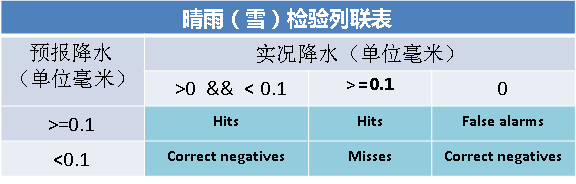
据此，晴雨预报的准确率计算公式也和普通的二分类检验的准确率有所差别，在本函数库中有针对性的增加概率晴雨准确率的计算模块，它包括直接计算函数和中间统计量计算函数。

**<font face="黑体" color=blue size = 5>晴雨预报的命中、空报、漏报、正确否定 </font>**     
**hfmc_of_sun_rain((ob, fo)**  
用来计算常用晴雨预报检验指标的中间统计量    


|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=blue size = 5>ob</font>**|实况数据, 任意维numpy数组|   
|**<font face="黑体" color=blue size = 5>fo</font>**| fo比Ob.shape多一维或者保持一致，fo.shape低维与ob.shape保持一致|   
|<font face="黑体" color=blue size=5>return</font>|如果fo和ob的shape一致（即只有一种预报），返回结果为一维数组；如果fo比ob高出一维，则返回2维数组，shape = (预报成员数，4）。最内层维度长度为4的一维numpy数组，其中最内层维度内容依次为根据晴雨（雪）检验评定表计算出的命中、空报、漏报、正确否定的样本数   |  

 
  
**<font face="黑体" color=blue size = 5>晴雨准确率</font>**     
**pc_of_sun_rain(ob, fo)**  
基于原始数据计算accuracy： （Hits+ Correct negatives）/Total，反映被正确预报的样本占比

|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=blue size = 5>ob</font>**|实况数据, 任意维numpy数组|   
|**<font face="黑体" color=blue size = 5>fo</font>**| fo比Ob.shape多一维或者保持一致，fo.shape低维与ob.shape保持一致|   
|<font face="黑体" color=blue size=5>return</font>|如果fo和ob的shape一致（即只有一种预报），返回结果为实数；如果fo比ob高出一维，则返回1维数组，长度等于预报成员数。其中每个元素为0到1的实数，完美预报对应值为1 |  
 

**<font face="黑体" color=blue size = 5>晴雨准确率</font>**     

**pc_of_sun_rain_hfmc(hfmc_array)**  
基于中间结果计算 accuracy： （Hits+ Correct negatives）/Total，反映被正确预报的样本占比

|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=blue size = 5>hfmc_array</font>**|包含检验中间结果的多维数组，其中最后一维长度为4，分别记录了命中、空报、漏报、正确否定的样本数，它通常是hfmc函数的计算结果，或者计算结果的累加|   
|<font face="黑体" color=blue size=5>return</font>|整数或数组，它比hfmc_array少了最后一维。每个元素值为0到1的实数，完美预报对应值为1 |    
**调用示例：**   



In [110]:
mem.pc_of_sun_rain(ob,fo1)  #单个预报

0.5

In [111]:
mem.pc_of_sun_rain(ob,fo2)   #多个预报

array([0.5, 0.5])

In [112]:
hfmc_sr = mem.hfmc_of_sun_rain(ob,fo1)  
mem.pc_of_sun_rain_hfmc(hfmc_sr)   #单个预报

0.5

In [113]:
hfmc_sr = mem.hfmc_of_sun_rain(ob,fo2)   #多个预报
mem.pc_of_sun_rain_hfmc(hfmc_sr)

array([0.5, 0.5])

在以上示例中，观测和预报的数据规模较小，可以直接调用评分函数计算相应评分，然而有些情况下待检验的数据太大不能整体存入一个numpy数组中，或者不方便整体存入一个numpy数组中，就不能调用上面的方式调用评分函数， 此时可以采用本函数库中中间结果统计函数来实现分块计算或并行计算的方式来实现计算。其检验步骤如下：  
***步骤1：根据需要将分块数据逐一输入到中间结果计算函数***  
***步骤2：将中间结果进行累加或合并***  
***步骤3：根据累加或合并的中间结果计算检验指标***  
通常上述计算中步骤1是最耗费计算资源，为了提高效率步骤1也可以采用**并行**的方式执行。此外，步骤1执行的结果也可**输出到文件**中，在后续的检验可以从中读入部分中间结果执行后续步骤，从而可以实现各种方式的分组检验，大大提高检验计算效率。
同时，在预报检验经常需要进行分组检验，获得不同类别预报的评分指标并进行对比。此时可以应用上述基于中间结果的检验函数对多维中间统计量的整体计算能力来简化代码的复杂度。  
**示例如下：**

In [114]:
day_count = 100
model_count = 3
grade_list = [0.1,0.2,0.3,0.4,0.5]
ob = np.random.randn(day_count,1000)
fo = np.random.randn(model_count,day_count,1000)
hfmc_array = np.zeros((model_count,len(grade_list),4))
hfmc_sumrain = np.zeros((model_count,4))
for i in range(day_count):
    ob1 = ob[i,:]
    fo1 = fo[:,i,:]
    hfmc_array += mem.hfmc(ob1,fo1,grade_list)         #计算1部分中间结果并累加到总体的中间结果中
    hfmc_sumrain += mem.hfmc_of_sun_rain(ob1,fo1)      #为晴雨预报准确率统计中间结果，并累加

In [115]:
mem.pc_of_sun_rain_hfmc(hfmc_sumrain)  #3个预报

array([0.52083, 0.52073, 0.52127])

In [116]:
mem.pc_hfmc(hfmc_array)   #3个预报，5个等级

array([[0.50161, 0.50892, 0.52424, 0.54595, 0.57071],
       [0.50227, 0.51114, 0.52668, 0.54706, 0.57258],
       [0.50283, 0.51247, 0.52718, 0.54696, 0.57241]])

In [117]:
mem.ts_hfmc(hfmc_array)  #3个预报，5个等级

array([[0.29813122, 0.26361564, 0.23311519, 0.20752247, 0.18077554],
       [0.29743807, 0.26488323, 0.2354585 , 0.20810532, 0.18306575],
       [0.2979114 , 0.26565748, 0.23576001, 0.20775042, 0.1824283 ]])

In [118]:
mem.bias_hfmc(hfmc_array)  #3个预报，5个等级

array([[1.00878225, 1.00781511, 1.00476952, 1.00344598, 1.00113195],
       [1.0030727 , 1.00419347, 1.00440263, 1.00098457, 1.00187581],
       [1.00289836, 1.00207291, 1.00356403, 0.99994208, 1.00003234]])

以上只是展示了分类检验的维度为1的情况，实际上上述思路可以扩展至任意高维的情况。熟练使用中间统计量计算和合并方法，基于中间统计量整体计算分类问题下的检验指标数组，是提高代码编写效果的关键。上述检验函数的内部也都采用了numpy的整体计算方式实现，在计算效率上进行了最大程度的优化。